In [27]:
#Import Important Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [28]:
df = pd.read_csv('H:\Machine learning_Codanics_and_CampusX\Machine_learning_code\Logistic_Regression_projects\Datasets\Logistic_regression_diabetes2.csv')


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Md. Emon\AppData\Local\Temp\ipykernel_13648\2912261198.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('H:\Machine learning_Codanics_and_CampusX\Machine_learning_code\Logistic_Regression_projects\Datasets\Logistic_regression_diabetes2.csv')


In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#display the shape of the dataset
df.shape

(768, 9)

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#split the dataset ino x and y 
from sklearn.model_selection import train_test_split

#split 
x = df.drop('Outcome', axis=1)
y = df['Outcome']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
#Initialize the Logistic Regression Model 
from sklearn.linear_model import LogisticRegression

#call the Model 
model = LogisticRegression(random_state=42, max_iter=1000)

#fit the model 
model.fit(xtrain, ytrain)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
0-- 
ypred = model.predict(xtest)

In [34]:
#evaluate the model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



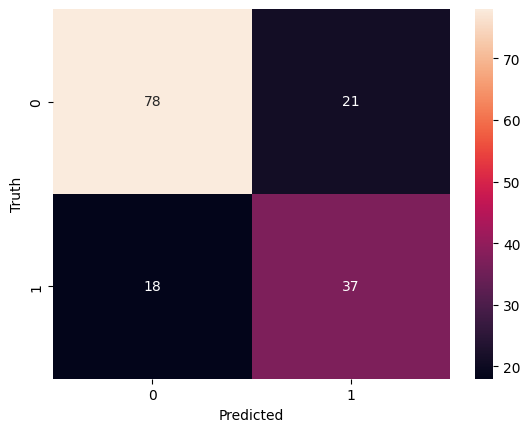

In [35]:

sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [41]:
import pickle 
with open("/regModel.pkl,",'wb') as f:
    pickle.dump(model, f)